In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading
dataset=pd.read_csv('salary.csv')

In [3]:
#summarising
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [4]:
'''MAPPING SALARY DATA TO BINARY VALUE'''
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [5]:
'''Seggreagate Dataset into x(Indep/ip) & y(OP/DEP var)'''
x=dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [6]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
'''TRAIN TEST SPLIT'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



In [8]:
'''FEATURE SCALING'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

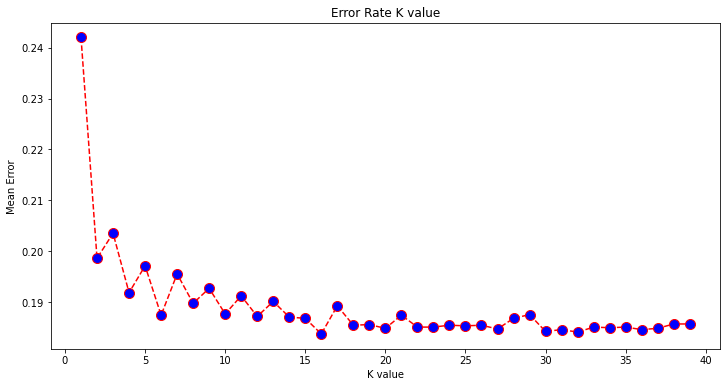

In [9]:
'''FINDING BEST VALUE OF K'''
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error for K values bw 1 and 40

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i !=y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')


In [14]:
'''TRAINING'''
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=2)  #p=2 refers to euclidean distance
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [15]:
'''PREDICTING IF THE EMPLOYEE WILL GET SALARY ABOVE 50K OR NOT'''
age=int(input("Enter new Employee's Age: "))
edu=int(input("Enter new Employee's Education: "))
cg=int(input("Enter new Employee's Capital Gain: "))
wh=int(input("Enter new Employee's working hrs per week: "))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)

if result==1:
    print("Employee might get Salary above 50K")
else:
    print("Employee might not get Salary above 50K")


Enter new Employee's Age: 68
Enter new Employee's Education: 9
Enter new Employee's Capital Gain: 0
Enter new Employee's working hrs per week: 40
[0]
Employee might not get Salary above 50K


In [16]:
'''predict for all test data'''
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [17]:
'''Validation--> confusion matrix'''
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("Confusion matrix: ")
print(cm)

print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion matrix: 
[[5882  311]
 [1185  763]]
Accuracy of the model: 81.62387913032796%
